In [1]:
from elecmarket import *
import os as os
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

np.random.seed(42)

In [2]:
scenario_name = r"C:\Users\Alicia BASSIERE\OneDrive - GENES\Documents\Paper 03 - MFG planner\Results\test"
cp = getpar("common_params.py")
cagents = [Conventional('Coal', cp, getpar('coal.py')),
          Conventional('Gas', cp, getpar('gas.py'))]

ragents = [Renewable('Wind', cp, getpar('renewable.py'))]

Niter = cp['iterations']
tol = cp['tolerance']

sim = Simulation(cagents,ragents,cp)

start_simu = time.time()

###################### Version MFG ######################

conv, elapsed, Nit, mfg_prices, mfg_revenues = sim.run(Niter, tol, cp['power'], cp['offset'])

print("MFG Revenues: ", mfg_revenues)
print('Elapsed time: ', elapsed/60)


Iteration 0
Weight: 0.2759; Wind: 2324420.01; Coal: 731262.01; Gas: 3729562.59; Total: 6785244.60
Iteration 1
Weight: 0.2385; Wind: 232929.37; Coal: 5144.99; Gas: 58828.82; Total: 296903.17
Iteration 2
Weight: 0.2108; Wind: 146405.24; Coal: 2074.29; Gas: 9478.61; Total: 157958.14
Iteration 3
Weight: 0.1895; Wind: 111210.09; Coal: 1580.21; Gas: 8073.82; Total: 120864.13
Iteration 4
Weight: 0.1724; Wind: 85094.82; Coal: 1274.95; Gas: 6585.36; Total: 92955.14
Iteration 5
Weight: 0.1585; Wind: 68299.80; Coal: 1033.79; Gas: 5643.72; Total: 74977.31
Iteration 6
Weight: 0.1469; Wind: 58536.43; Coal: 860.46; Gas: 4511.22; Total: 63908.11
Iteration 7
Weight: 0.1370; Wind: 49767.04; Coal: 732.42; Gas: 4018.53; Total: 54517.99
Iteration 8
Weight: 0.1285; Wind: 44031.48; Coal: 622.68; Gas: 3521.95; Total: 48176.10
Iteration 9
Weight: 0.1211; Wind: 37576.94; Coal: 548.80; Gas: 3100.73; Total: 41226.47
Iteration 10
Weight: 0.1146; Wind: 33479.19; Coal: 477.21; Gas: 2619.73; Total: 36576.13
Iteration

In [3]:
out = sim.write(scenario_name)

try:
    os.mkdir(scenario_name)
except FileExistsError:
    print('Directory already exists')
os.system("cp common_params.py "+scenario_name+"/common_params.py")

# parameter files are copied to output directory; change this if you change agent types
os.system("cp coal.py "+scenario_name+"/coal.py")
os.system("cp gas.py "+scenario_name+"/gas.py")
os.system("cp renewable.py "+scenario_name+"/renewable.py")
#os.system("cp pv.py "+scenario_name+"/pv.py")
os.system("cp "+scenario_name+'.csv '+scenario_name+"/"+scenario_name+".csv")


Directory already exists


1

In [4]:
# Years for tick marks
years = list(range(2024, 2041))  # Years from 2024 to 2040

# Creating a DataFrame for easy plotting with seaborn
df = pd.DataFrame({
    'Year': out['time'],
    'Peak Price': out['peak price'],
    'Offpeak Price': out['offpeak price'],
    'Coal Capacity': out['Coal capacity'],
    'Gas Capacity': out['Gas capacity'],
    'Wind Capacity': out['Wind capacity'],
    'Coal Price': out['Fuel 0'],
    'Gas Price': out['Fuel 1'],
    'Peak Demand': sim.pdemand,
    'Offpeak Demand': sim.opdemand,
    'Coal Offpeak Supply': out['Coal offpeak supply'],
    'Gas Offpeak Supply': out['Gas offpeak supply'],
    'Wind Offpeak Supply': out['Wind offpeak supply'],
    'Coal Peak Supply': out['Coal peak supply'],
    'Gas Peak Supply': out['Gas peak supply'],
    'Wind Peak Supply': out['Wind peak supply']
})

df['Year'] = df['Year'].map(lambda x: 2024 + x)


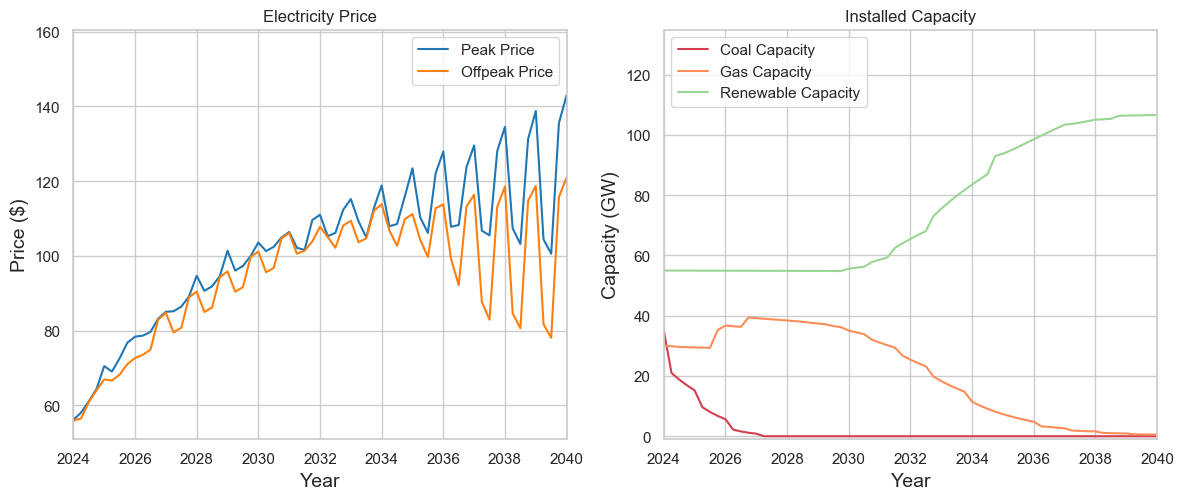

In [5]:

# Setting the style and context for seaborn
sns.set(style="whitegrid")

# Define the figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plotting the electricity prices with seaborn
sns.lineplot(ax=axes[0], x='Year', y='Peak Price', data=df, label='Peak Price', color='tab:blue')
sns.lineplot(ax=axes[0], x='Year', y='Offpeak Price', data=df, label='Offpeak Price', color='tab:orange')

axes[0].set_ylabel('Price ($)', fontsize=14)
axes[0].set_xlabel('Year', fontsize=14)
axes[0].set_xlim(2024, 2040)
axes[0].legend()

# Set x-axis ticks to display every other year for less clutter
tick_indices = range(2024, 2041, 2)  # This skips every other year
axes[0].set_xticks(tick_indices)

# Plotting the capacity for each agent type with seaborn
sns.lineplot(ax=axes[1], x='Year', y='Coal Capacity', data=df, label='Coal Capacity', color='#d53e4f')
sns.lineplot(ax=axes[1], x='Year', y='Gas Capacity', data=df, label='Gas Capacity', color='#fc8d59')
sns.lineplot(ax=axes[1], x='Year', y='Wind Capacity', data=df, label='Renewable Capacity', color='#99d594')
axes[1].set_ylabel('Capacity (GW)', fontsize=14)
axes[1].set_xlabel('Year', fontsize=14)
axes[1].set_ylim(-1, 135)
axes[1].set_xlim(2024, 2040)
axes[1].legend(loc='upper left')

# Apply the same x-axis settings to the second subplot
axes[1].set_xticks(tick_indices)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure to a PDF file
plt.savefig(scenario_name + "/" + 'price_capacity.pdf', format='pdf')
axes[0].set_title('Electricity Price')
axes[1].set_title('Installed Capacity')
# Show the plot (optional, can be removed if only saving is needed)
plt.show()


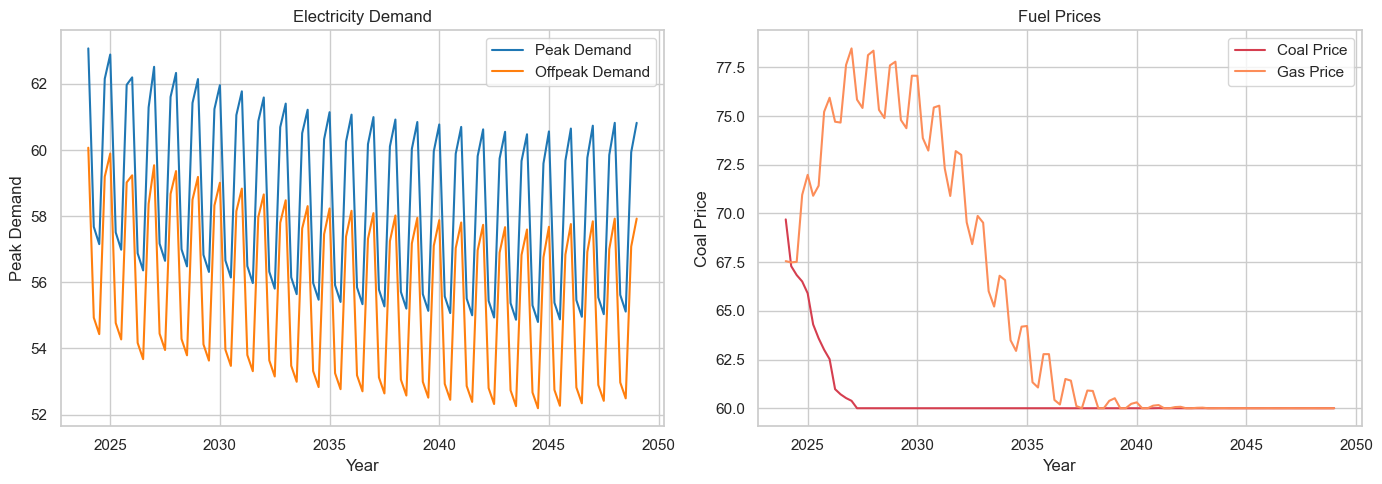

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# Plotting demand
sns.lineplot(ax=axes[0], x='Year', y='Peak Demand', data=df, label='Peak Demand', color='tab:blue')
sns.lineplot(ax=axes[0], x='Year', y='Offpeak Demand', data=df, label='Offpeak Demand', color='tab:orange')
axes[0].set_title('Electricity Demand')
axes[0].legend()

# Plotting fuel prices
sns.lineplot(ax=axes[1], x='Year', y='Coal Price', data=df, label='Coal Price', color='#d53e4f')
sns.lineplot(ax=axes[1], x='Year', y='Gas Price', data=df, label='Gas Price', color='#fc8d59')
axes[1].set_title('Fuel Prices')
axes[1].legend()

plt.tight_layout()
plt.savefig(scenario_name + "/demand_fuelprice.pdf", format='pdf')
plt.show()


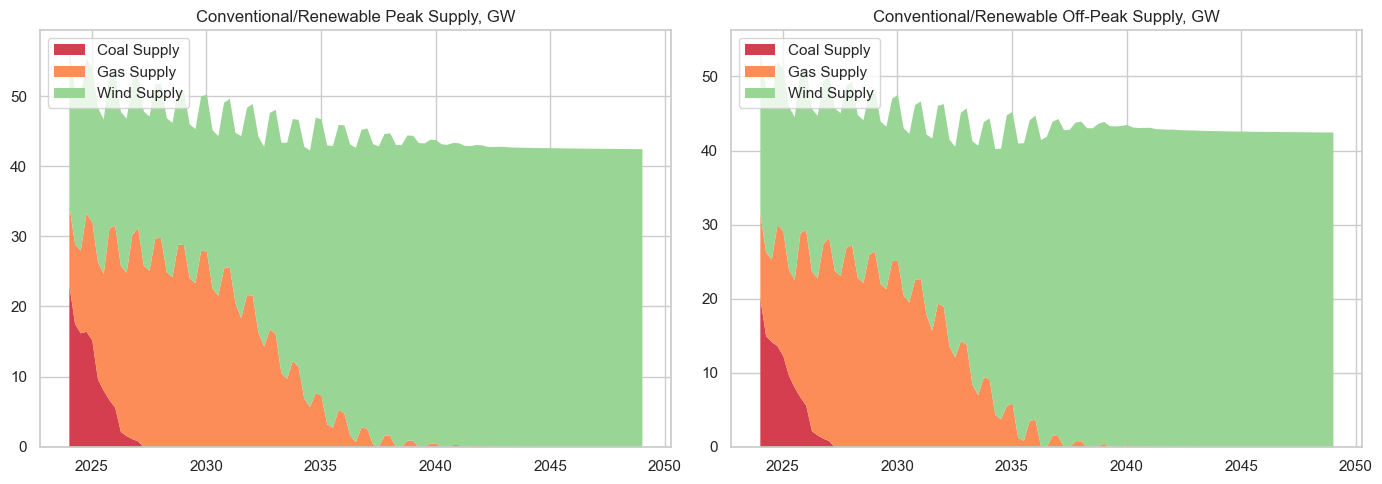

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# Plotting peak supply with stackplot
axes[0].stackplot(df['Year'], df['Coal Peak Supply'], df['Gas Peak Supply'], df['Wind Peak Supply'],
                  labels=['Coal Supply', 'Gas Supply', 'Wind Supply'],
                  colors=['#d53e4f', '#fc8d59', '#99d594'], linewidth=0)
axes[0].set_title('Conventional/Renewable Peak Supply, GW')
axes[0].legend(loc='upper left')

# Plotting off-peak supply with stackplot
axes[1].stackplot(df['Year'], df['Coal Offpeak Supply'], df['Gas Offpeak Supply'], df['Wind Offpeak Supply'],
                  labels=['Coal Supply', 'Gas Supply', 'Wind Supply'],
                  colors=['#d53e4f', '#fc8d59', '#99d594'], linewidth=0)
axes[1].set_title('Conventional/Renewable Off-Peak Supply, GW')
axes[1].legend(loc='upper left')

plt.tight_layout()
plt.savefig(scenario_name + "/supply.pdf", format='pdf')
plt.show()

In [8]:
# print("############### Planner Version ###############")
#
# initial_prices = np.random.rand(2 * sim.Nt + sim.Nfuels * sim.Nt)*10
#
# planner_objective, sim.Prp, sim.Prop, sim.fPrice = sim.optimizePrices(mfg_prices)
#
# end_simu = time.time()
#
# print("Time: ", end_simu-start_simu, "s")
#
# out = sim.write(scenario_name)
#
# try:
#     os.mkdir(scenario_name)
# except FileExistsError:
#     print('Directory already exists')
# os.system("cp common_params.py "+scenario_name+"/common_params.py")
#
# # parameter files are copied to output directory; change this if you change agent types
# os.system("cp coal.py "+scenario_name+"/coal.py")
# os.system("cp gas.py "+scenario_name+"/gas.py")
# os.system("cp renewable.py "+scenario_name+"/renewable.py")
#
# os.system("cp "+scenario_name+'.csv '+scenario_name+"/"+scenario_name+".csv")
#
#
# plt.figure(figsize=(14,5))
# plt.subplot(121)
# plt.plot(2025+out['time'], out['peak price'], label='peak price')
# plt.plot(2025+out['time'], out['offpeak price'], label='offpeak price')
# plt.legend()
# plt.title('Electricity price (Planner)')
# plt.subplot(122)
#
# # Plotting the capacity for each agent type; modify this if you change agent types
# plt.plot(2025+out['time'], out['Coal capacity'], label='Coal capacity')
# plt.plot(2025+out['time'], out['Gas capacity'],label='Gas capacity')
# plt.plot(2025+out['time'], out['Renewable capacity'], label='Renewable capacity')
# plt.legend()
# plt.title('Installed capacity (Planner)')
# plt.savefig(scenario_name+"/"+'price_capacity.pdf', format='pdf')
#
# plt.figure(figsize=(14, 5))
# plt.subplot(121)
# plt.plot(2025+out['time'], sim.pdemand, label='peak demand')
# plt.plot(2025+out['time'], sim.opdemand, label='offpeak demand')
# plt.legend()
# plt.title('Electricity demand (Planner)')
# plt.subplot(122)
#
# # Plotting the fuel prices; modify this if you change fuel types
# plt.plot(2025+out['time'], out['Fuel 0'], label='Coal price')
# plt.plot(2025+out['time'], out['Fuel 1'], label='Gas price')
# plt.legend()
# plt.title('Fuel price (Planner)')
# #plt.plot(2025+out['time'],np.interp(out['time'],cp["carbon tax"][0],cp["carbon tax"][1]))
# plt.savefig(scenario_name+"/"+'demand_fuelprice.pdf',format='pdf')
#
#
# plt.figure(figsize=(14,5))
# plt.subplot(121)
#
# # Plotting the supply for each agent; modify this if you change agent types
# plt.bar(2025+out['time'],out['Coal peak supply'],width=0.25,label='Coal supply')
# plt.bar(2025+out['time'],out['Gas peak supply'],width=0.25,
#         bottom=out['Coal peak supply'],label='Gas supply')
# plt.bar(2025+out['time'],out['Renewable peak supply'],width=0.25,
#         bottom=out['Gas peak supply']+out['Coal peak supply'],label='Renewable supply')
# #plt.ylim([0,80])
# plt.title('Conventional/ renewable peak supply, GW (Planner)')
# plt.legend()
# plt.subplot(122)
# plt.bar(2025+out['time'],out['Coal offpeak supply'],width=0.5,label='Coal supply')
# plt.bar(2025+out['time'],out['Gas offpeak supply'],width=0.25,
#         bottom=out['Coal offpeak supply'],label='Gas supply')
# plt.bar(2025+out['time'],out['Renewable offpeak supply'],width=0.25,
#         bottom=out['Gas offpeak supply']+out['Coal offpeak supply'],label='Renewable supply')
#
# plt.title('Conventional/ renewable off-peak supply, GW (Planner)')
#
# #plt.ylim([0,80])
#
# plt.legend()
# plt.savefig(scenario_name+"/"+'supply.pdf',format='pdf')
# plt.show()
#
#
